Developing an NLP and ML project

   collecting data
    uderstanding problem
    since it is texxt we need to follow nlp pipeline
    develope ml model
    testing model 
    save model 
    load the model and test once
    Deploy in any cloud[AWS, IBM, Google cloud,MIcrosoft Azure,Heroku]

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load the data set and check whether important points are available or not

In [173]:
#as above while loading we can notice error for that type of data sets we will have file extensions



In [5]:
data=pd.read_csv('E:\\nlp data sets\\spam.csv',encoding='ISO-8859-1')

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.shape

(5572, 5)

#since feature(column) 3,4,5 havaing lot of null values

In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data['Unnamed: 2'].isnull().sum()

5522

In [10]:
#checking unique things in columns
for i in data.columns[2:]:
    print('unique in column', i ,'is:' , data[i].unique())
print(i)

unique in column Unnamed: 2 is: [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endof me wk offda

In [11]:
data1=data.columns[2:]
data1

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
# as abov we dont have any uesful thing i am removing that

for i in data.columns[2:]:
    data=data.drop(i,axis=1)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# changing column names
data=data.rename({'v1':'target','v2':'Emails'},axis=1)

In [15]:
data.head()

,target,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#let me find whethere data is balanced or not means both ham and spam in target are of equal or not

In [17]:
#counting number of words in raw data

In [28]:
data['word count']= data['Emails'].apply(lambda x : len(x.split()))

In [29]:
data.head()

,target,Emails,word count,char count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


In [30]:
# character count

In [31]:
def count(text):
    count=0
    c=''
    for i in text:
        c+=i
        count+=1
    return count


In [32]:
data['char count']= data['Emails'].apply(lambda x : count(x))

In [33]:
data.head()

,target,Emails,word count,char count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


In [34]:
# average of char count with word count

In [35]:
data['Average']=data['char count'] /data['word count']

In [36]:
data.head()

,target,Emails,word count,char count,Average
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [37]:
# finding number of stop words in the raw data

In [39]:
from nltk.corpus import stopwords

In [40]:
data['stop words']=data['Emails'].apply(lambda x: len([i  for i in x.split() if i in stopwords.words('english') ]))

In [41]:
data.head()

,target,Emails,word count,char count,Average,stop words
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5


In [ ]:
#finding number of digits in a sentence

In [42]:
data['number count']=data['Emails'].apply(lambda x:len([i for i in x if i.isdigit()]))

In [43]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [44]:
#checking
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [45]:
# we can see above it is Imbalanced ,but develop a model and see

<AxesSubplot: >

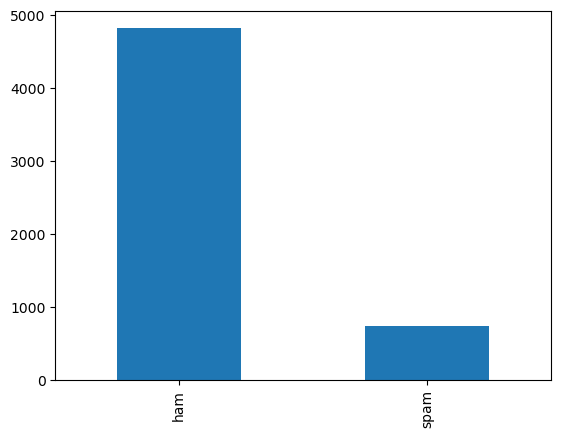

In [46]:
data['target'].value_counts().plot.bar()

In [47]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [205]:
#now preprocessing the data

-clean the data # removing punctuaitions
-lower text
-remove stop words
-apply stemming or lematization


SyntaxError: invalid syntax (4046702458.py, line 3)

In [48]:
# before doing i will conert dependent varaibles first

#ham=0

#spam=1
data['target']=data['target'].map({'ham':0,'spam':1}).astype(int) 

In [49]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [50]:
for i in data.index:
    print(data['target'][i])

0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0


In [51]:
for i in data.target:
    print(i)

0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0


In [52]:
# as from both are same for collecting dependent values

In [53]:
#for email columns

In [54]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [55]:
#the above we are not getting 9999 but we are also getting 35

#here comes the concept of regex 

in regex d refrs to number

SyntaxError: invalid syntax (297741365.py, line 5)

In [56]:
import re
a='i am data scientist 35 and my number 9999098765'
sol=re.findall('\d{10}',a) # d is digits and {10} is combination of 10 digits
print(sol)

['9999098765']


Using regex i am collecting only text and numbers 

Eg

1)bring me 10 apples

2)bring me apples
#here above in eg 1 number plays a keyrole

In [57]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [59]:
# in regex we have a method called sub whicch keeps what we wwant and removes what we dont want

In [60]:
# whereever is scients replace science
sol=re.sub('[^a-zA-Z]',' ',a)
print(a)
print(sol)

i am data scientist 35 and my number 9999098765
i am data scientist    and my number           


In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s=PorterStemmer()

In [62]:
# firstly checking for on rwo
cc=data['Emails'][0]
print(cc)
sol=re.sub('[^a-zA-Z0-9]',' ',cc)# removing punctuations
sol=sol.lower() # lowering text
sol=sol.split() # spliting for removing stopwords
sol=[i for i in sol if i not in stopwords.words('english')]
sol=[s.stem(j) for j in sol] # applying stemming

sol=' '.join(sol)
print(' ')
print(sol)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
 
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [63]:
list1=[]
for i in data.index:
    sol1=re.sub('[^a-zA-Z0-9]',' ',data['Emails'][i]) #cleaning
    sol1=sol1.lower()
    sol1=sol1.split()
    sol1=[i for i in sol1 if i not in stopwords.words('english')]
    sol1=[s.stem(i) for i in sol1]
    sol1=' '.join(sol1)
    list1.append(sol1)
    
    

In [64]:
list1

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
# on the top of raw data i applied word count,charcter count,stop words count,number count,average count,
#and complete preprocessig data

In [ ]:
# converting text into nmbers but not with tf_idf but bty padding we will do it

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [70]:
list1[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [71]:
voc_size=1000 # for having range in one hot between 1 t0 1000 we are dealing this

vector=[one_hot(i,voc_size)for i in list1]

In [72]:
vector

[[731, 758, 963, 711, 461, 155, 20, 425, 414, 777, 261, 378, 445, 952, 262, 8],
 [864, 459, 487, 969, 237, 513],
 [525,
  473,
  332,
  114,
  706,
  389,
  338,
  909,
  817,
  773,
  608,
  145,
  591,
  648,
  338,
  443,
  133,
  473,
  317,
  375,
  286,
  389,
  60,
  180,
  72],
 [237, 93, 787, 145, 98, 237, 60, 57, 787],
 [872, 399, 92, 16, 909, 877, 432],
 [363,
  428,
  813,
  44,
  621,
  368,
  369,
  76,
  776,
  4,
  559,
  864,
  816,
  375,
  873,
  721,
  992,
  436,
  44],
 [392, 56, 76, 397, 696, 76, 661, 660],
 [26,
  245,
  101,
  101,
  181,
  83,
  829,
  851,
  492,
  366,
  748,
  284,
  259,
  637,
  219,
  366],
 [843,
  568,
  849,
  508,
  279,
  253,
  856,
  303,
  7,
  422,
  988,
  200,
  422,
  378,
  672,
  326,
  7,
  975],
 [6,
  286,
  20,
  237,
  895,
  25,
  830,
  750,
  75,
  6,
  857,
  525,
  988,
  6,
  830,
  883,
  525,
  877],
 [800, 705, 351, 316, 796, 663, 297, 650, 815, 834, 784, 28],
 [701,
  700,
  389,
  304,
  303,
  712,
  279,
 

In [73]:
print(len(vector[0]))

16


In [75]:
a=list1[0]
a1=a.split()
print(len(a1))

16


In [ ]:
# from above we can see both having same length

In [ ]:
## now we are going to do padding so as to maintain same length in all sentences

In [78]:
# for finding maximum numbers of sentecce in a emails so as to do padding accordigly
c=[]
for i in vector:
    c.append(len(i))

In [79]:
print(max(c))

78


In [80]:
sent_len=78
pad_vectors=pad_sequences(vector,maxlen=sent_len,padding='post')

In [81]:
pad_vectors

array([[731, 758, 963, ...,   0,   0,   0],
       [864, 459, 487, ...,   0,   0,   0],
       [525, 473, 332, ...,   0,   0,   0],
       ...,
       [515, 908,  12, ...,   0,   0,   0],
       [621, 789, 391, ...,   0,   0,   0],
       [225, 725, 122, ...,   0,   0,   0]])

In [ ]:
## my independent = pad_vectors

In [ ]:
## my dependent is data['target'

In [82]:
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [ ]:
# now we will dealing with rnn

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,LSTM,Activation
from tensorflow.keras.activations import sigmoid,relu,tanh,softmax


In [150]:
model=Sequential()

model.add(Embedding(voc_size, 10, input_length=sent_len)) # embedding layer
model.add(LSTM(100))  # means it will have 100 boxes
model.add(Dense(1,activation='sigmoid'))

In [182]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['Acc'])

In [180]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 10)            10000     
                                                                 
 lstm_4 (LSTM)               (None, 100)               44400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 54,501
Trainable params: 54,501
Non-trainable params: 0
_________________________________________________________________


In [181]:
type(pad_vectors)

numpy.ndarray

In [154]:
type(data['target'])

pandas.core.series.Series

In [155]:
# before giving to model both should be in numpy array format

In [164]:
X=np.array(pad_vectors)
y=np.array(data['target'])

In [166]:
print(type(X) ,type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [168]:
len(X)

5572

In [169]:
import sklearn

In [170]:
from sklearn.model_selection import train_test_split

In [173]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [174]:
len(X_train)

3733

In [183]:
model.fit(X_train , y_train , batch_size=32, epochs=20)

Epoch 1/20
117/117 [==============================] - 18s 86ms/step - loss: 0.4268 - Acc: 0.8674
Epoch 2/20
117/117 [==============================] - 12s 102ms/step - loss: 0.3939 - Acc: 0.8674
Epoch 3/20
117/117 [==============================] - 9s 80ms/step - loss: 0.3928 - Acc: 0.8674
Epoch 4/20
117/117 [==============================] - 9s 80ms/step - loss: 0.3931 - Acc: 0.8674
Epoch 5/20
117/117 [==============================] - 10s 84ms/step - loss: 0.3930 - Acc: 0.8674
Epoch 6/20
117/117 [==============================] - 10s 81ms/step - loss: 0.3923 - Acc: 0.8674
Epoch 7/20
117/117 [==============================] - 10s 83ms/step - loss: 0.3931 - Acc: 0.8674
Epoch 8/20
117/117 [==============================] - 10s 82ms/step - loss: 0.3929 - Acc: 0.8674
Epoch 9/20
117/117 [==============================] - 10s 81ms/step - loss: 0.3920 - Acc: 0.8674
Epoch 10/20
117/117 [==============================] - 9s 80ms/step - loss: 0.3923 - Acc: 0.8674
Epoch 11/20
117/117 [==========

In [190]:
y_test_pred=model.predict(X_test)

58/58 [==============================] - 2s 25ms/step


In [191]:
y_test_pred

array([[0.14071259],
       [0.1407125 ],
       [0.14071245],
       ...,
       [0.14071237],
       [0.14071238],
       [0.14071245]], dtype=float32)

In [192]:
c=[]
for i in y_test_pred:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)

In [193]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [194]:
accuracy_score(y_test,c)

0.8629690048939641

In [195]:
confusion_matrix(y_test,c)

array([[1587,    0],
       [ 252,    0]], dtype=int64)

In [197]:
1587/(252+1587)

0.8629690048939641

In [199]:
print(classification_report(y_test,c))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1587
           1       0.00      0.00      0.00       252

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.74      0.86      0.80      1839



C:\Users\RGUKT\anaconda3\envs\newanaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RGUKT\anaconda3\envs\newanaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RGUKT\anaconda3\envs\newanaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model testing

In [212]:
def jaga():
    a=input('eneter a mail')
    c1=[]
    sol=re.sub('[^a-zA-Z0-9]',' ',a)
    sol=sol.lower()
    sol=sol.split()
    sol=[i for i in sol if i not in stopwords.words('english')]
    sol=[s.stem(j) for j in sol]
    print(sol)
    sol=' '.join(sol)
    print(sol)
    c1.append(sol)
    print(c1)
    ve=[one_hot(i,voc_size) for i in c1]
    print(ve)
    print(' ')
    pad_vec=pad_sequences(ve,maxlen=sent_len,padding='post')
    if model.predict(pad_vec) > 0.5:
        print('spam mail')
    else:
        print('ham mail')
    
    
    

In [213]:
jaga()

eneter a maili am goin to temple
['goin', 'templ']
goin templ
['goin templ']
[[702, 256]]
 
1/1 [==============================] - 0s 56ms/step
ham mail


In [214]:
# checking from data set

In [215]:
data.head()

,target,Emails,word count,char count,Average,stop words,number count
0,0,"Go until jurong point, crazy.. Available only ...",20,111,5.550000,4,0
1,0,Ok lar... Joking wif u oni...,6,29,4.833333,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714,5,25
3,0,U dun say so early hor... U c already then say...,11,49,4.454545,2,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308,5,0


In [216]:
data['Emails'][1] # it should be 0 means ham mail 

'Ok lar... Joking wif u oni...'

In [234]:
jaga()

eneter a mail'Ok lar... Joking wif u oni...'  1  jaga()
['ok', 'lar', 'joke', 'wif', 'u', 'oni', '1', 'jaga']
ok lar joke wif u oni 1 jaga
['ok lar joke wif u oni 1 jaga']
[[864, 459, 487, 969, 237, 513, 992, 426]]
 
1/1 [==============================] - 0s 57ms/step
ham mail
